In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import models
import image_utils

In [3]:
image_width = 256
image_height = 256
channels = 4
extension = '.tif'
classes = {
    'pivot': 0,
    'infra': 1,
}
num_classes = len(classes)
weights_path = "weights"

In [4]:
model = models.get_model(image_width, image_height, channels, num_classes, learning_rate=0.00001)

In [5]:
features, target = image_utils.load_data("data/train", classes, image_width, image_height, extension, dargumentation_enabled=True)

  0%|          | 0/1139 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
 32%|███▏      | 360/1139 [00:26<00:57, 13.45it/s]/notebooks/tf_object_detection/image_utils.py:24: RuntimeWarning: invalid value encountered in true_divide
  band_normalized = (2 * ((band - band_min) / float(band_max - band_min))) - 1
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_meth

Completed!!!


In [6]:
classifier = tf.estimator.Estimator(model_fn=model, model_dir=weights_path)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_save_summary_steps': 100, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f12360c97b8>, '_save_checkpoints_secs': 600, '_service': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_task_id': 0, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': None, '_master': '', '_task_type': 'worker', '_save_checkpoints_steps': None, '_model_dir': 'weights'}


In [7]:
logging_hook = tf.train.LoggingTensorHook(tensors={"probabilities": "softmax_tensor"}, every_n_iter=50)

In [8]:
epochs=5
batch_size=100

In [9]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": features},
    y=np.asarray(target, dtype=np.int32),
    batch_size=batch_size,
    num_epochs=epochs,
    shuffle=True
)

In [10]:
classifier.train(input_fn=train_input_fn, hooks=[logging_hook])

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into weights/model.ckpt.
INFO:tensorflow:probabilities = [[0.8231163  0.17688367]
 [0.99223137 0.00776856]
 [0.309182   0.690818  ]
 [0.02981197 0.9701881 ]
 [0.34470457 0.65529543]
 [0.1414495  0.85855055]
 [0.9027293  0.09727079]
 [0.9946806  0.00531944]
 [0.07362824 0.9263718 ]
 [0.6301392  0.3698608 ]
 [0.2915942  0.7084058 ]
 [0.19830841 0.8016916 ]
 [0.5742513  0.42574865]
 [0.17008983 0.82991016]
 [0.08623429 0.9137657 ]
 [0.22442923 0.77557075]
 [0.00538013 0.99461985]
 [0.24407862 0.7559214 ]
 [0.9057646  0.09423543]
 [0.03637494 0.9636251 ]
 [0.999332   0.00066801]
 [0.03921072 0.96078926]
 [0.9471601  0.05283984]
 [0.83117765 0.16882238]
 [0.68327975 0.31672025]
 [0.03831441 0.96168554]
 [0.7246427  0.2753573 ]
 [0.45332438 0.5466757 ]
 [0.92354935 0.07645059]
 [0.9861252  0.01387487]
 [0.82449216 0.17550786]
 [0.5968084  0.40319166]
 [0.8189724  0.18102767]
 [0.67643744 0.3235626 ]
 [0.2927

INFO:tensorflow:global_step/sec: 0.920602
INFO:tensorflow:probabilities = [[0.44767988 0.5523201 ]
 [0.52210814 0.47789183]
 [0.62381345 0.37618658]
 [0.5116035  0.48839653]
 [0.41490507 0.5850949 ]
 [0.4489666  0.5510334 ]
 [0.50103104 0.498969  ]
 [0.4975437  0.5024563 ]
 [0.5440769  0.45592314]
 [0.4911459  0.50885415]
 [0.4848133  0.5151867 ]
 [0.54494715 0.45505285]
 [0.57542926 0.42457077]
 [0.58651006 0.4134899 ]
 [0.48257253 0.51742744]
 [0.5347614  0.46523854]
 [0.4727233  0.52727675]
 [0.5299781  0.47002193]
 [0.49670467 0.5032953 ]
 [0.52329654 0.47670346]
 [0.42014503 0.579855  ]
 [0.48237598 0.517624  ]
 [0.47572035 0.52427965]
 [0.5308228  0.46917722]
 [0.49596712 0.50403285]
 [0.53913826 0.46086174]
 [0.5239256  0.47607443]
 [0.4791083  0.5208917 ]
 [0.43582425 0.5641758 ]
 [0.5127347  0.48726526]
 [0.44571263 0.5542874 ]
 [0.4695883  0.53041166]
 [0.5174429  0.48255712]
 [0.43862072 0.56137925]
 [0.46021745 0.5397826 ]
 [0.49173558 0.5082644 ]
 [0.46752864 0.53247136]
 

INFO:tensorflow:Saving checkpoints for 372 into weights/model.ckpt.
INFO:tensorflow:Loss for final step: 0.70253605.


In [11]:
validation_features, validation_target = image_utils.load_data("data/validation", classes, image_width, image_height, extension)

  0%|          | 0/111 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 89/89 [00:01<00:00, 71.49it/s]


Completed!!!


In [12]:
classifier = tf.estimator.Estimator(model_fn=model, model_dir=weights_path)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_save_summary_steps': 100, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f105a127668>, '_save_checkpoints_secs': 600, '_service': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_task_id': 0, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': None, '_master': '', '_task_type': 'worker', '_save_checkpoints_steps': None, '_model_dir': 'weights'}


In [13]:
validation_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": validation_features},
        y=np.asarray(validation_target, dtype=np.int32),
        num_epochs=1,
        shuffle=False)

In [14]:
validation_results = classifier.evaluate(input_fn=validation_input_fn)
print(validation_results)

INFO:tensorflow:Starting evaluation at 2018-09-11-22:36:32
INFO:tensorflow:Restoring parameters from weights/model.ckpt-372
INFO:tensorflow:Finished evaluation at 2018-09-11-22:36:35
INFO:tensorflow:Saving dict for global step 372: accuracy = 0.555, global_step = 372, loss = 0.69727165
{'accuracy': 0.555, 'loss': 0.69727165, 'global_step': 372}


In [20]:
pivot1 = image_utils.load_file("tests/pivot1.tif")
pivot2 = image_utils.load_file("tests/pivot2.tif")
pivot3 = image_utils.load_file("tests/pivot3.tif")
pivot4 = image_utils.load_file("tests/pivot4.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Pivot 4')

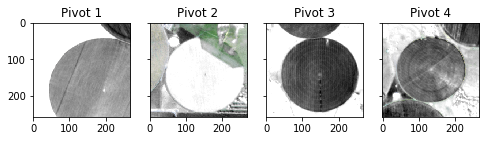

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(pivot1, interpolation='nearest')
ax[0].set_title("Pivot 1")

ax[1].imshow(pivot2, interpolation='nearest')
ax[1].set_title("Pivot 2")

ax[2].imshow(pivot3, interpolation='nearest')
ax[2].set_title("Pivot 3")

ax[3].imshow(pivot4,interpolation='nearest')
ax[3].set_title("Pivot 4")


In [ ]:
infra1 = image_utils.load_file("tests/infra1.tif")
infra2 = image_utils.load_file("tests/infra2.tif")
infra3 = image_utils.load_file("tests/infra3.tif")
infra4 = image_utils.load_file("tests/infra4.tif")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(infra1, interpolation='nearest')
ax[0].set_title("Pivot 1")

ax[1].imshow(infra2, interpolation='nearest')
ax[1].set_title("Pivot 2")

ax[2].imshow(infra3, interpolation='nearest')
ax[2].set_title("Pivot 3")

ax[3].imshow(infra4,interpolation='nearest')
ax[3].set_title("Pivot 4")
